# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [ ]:
##matplotlib #grafico
##seaborn #grafico
#scikit-learn #inteligencia artificial

!pip install matplotlib
!pip install seaborn
!PIP install scikit-learn


In [1]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

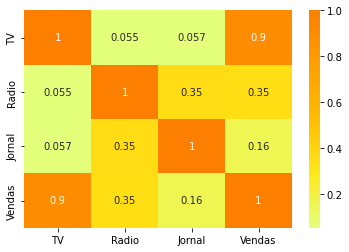

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt



#Cria o gráfico e exibe o gráfico (sempre que importar o seaborn, importa o matplotlib. Parametro cmap passa as cores)
sns.heatmap(tabela.corr(), cmap="Wistia",annot = True)
#exibe o gráfico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [18]:
#dados de x -> o resto (que vou usar para fazer a previsão)
#dados de y-> quem quero prever
#dados de treino
#dados de teste
#normalmente mais informação para treino (70% a 80%)

y = tabela["Vendas"]

x = tabela[["TV","Radio","Jornal"]]


from sklearn.model_selection import train_test_split  #divide a base em teste e treino

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3)

#(random_state = 1) = emaralha aleatória mas de forma física

In [21]:
display(y_teste)

54     20.2
126     6.6
158     7.3
102    19.8
169    20.0
141    19.2
165    16.9
95     16.9
194    17.3
129     9.7
135    11.6
182     8.7
25     17.0
78      5.3
177    16.7
163    18.0
93     22.2
156    15.3
67     13.4
39     21.5
0      22.1
147    25.4
38     10.1
46     10.6
154    20.6
22      5.6
89     16.7
148    10.9
107    12.0
4      17.9
33     17.4
124    19.7
172     7.6
94     11.5
91      7.3
49      9.7
68     18.9
70     18.3
175    27.0
84     21.7
53     21.2
151    11.6
44      8.5
138     9.6
14     19.0
64     16.0
109    19.8
136     9.5
77     14.2
193    19.6
191    11.9
27     20.9
187    17.3
59     18.4
75      8.7
76      6.9
137    20.8
15     22.4
66     11.0
100    16.7
Name: Vendas, dtype: float64

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#criar modelos
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treinar os modelos
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [24]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

#comparar as previsões com o x_teste

from sklearn import metrics

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9290027454876272
0.9682450575243329


#### Visualização Gráfica das Previsões

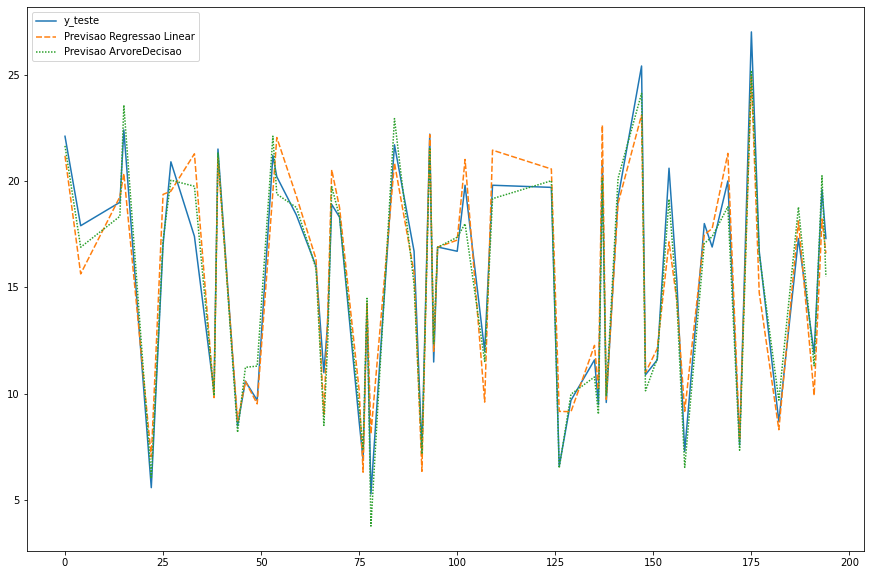

In [26]:
# arvore de decisao é o melhor modelo, vamos usar ele para fazer as previsões

# comparação dos novos modelos
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsao Regressao Linear"] = previsao_regressaolinear
tabela_auxiliar["Previsao ArvoreDecisao"] = previsao_arvoredecisao

plt.figure(figsize = (15,10))
sns.lineplot(data=tabela_auxiliar)
plt.show()


#### Como fazer uma nova previsão?

In [34]:
#importar a tabela com as novas informações que você quer prever

nova_tabela = pd.read_csv("novos.csv")
display(nova_tabela)

#Usar o modelo_arvoredecisao e fazer um .predict com ele

previsao = modelo_regressaolinear.predict(nova_tabela)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 6.28731447  7.09391556 18.81756606]
